 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [31]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_path = Path('Resources/whale_returns.csv')

whale_df = pd.read_csv(whale_path, index_col='Date', infer_datetime_format=True, parse_dates=True).sort_index(inplace=True)
whale_df

/var/folders/7p/1ky7b7fs1x18nvftj75rs6yr0000gn/T/ipykernel_49600/888910557.py:4: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  whale_df = pd.read_csv(whale_path, index_col='Date', infer_datetime_format=True, parse_dates=True).sort_index()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [3]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_df.dropna(inplace=True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_path = Path('Resources/algo_returns.csv')

algo_df = pd.read_csv(algo_path, index_col='Date', infer_datetime_format=True, parse_dates=True).sort_index(inplace=True)
algo_df

/var/folders/7p/1ky7b7fs1x18nvftj75rs6yr0000gn/T/ipykernel_49600/1983125847.py:4: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  algo_df = pd.read_csv(algo_path, index_col='Date', infer_datetime_format=True, parse_dates=True).sort_index()


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [6]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_df.dropna(inplace=True)

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_path = Path('Resources/sp500_history.csv')

sp500_df = pd.read_csv(sp500_path, index_col='Date', infer_datetime_format=True, parse_dates=True).sort_index(inplace=True)
sp500_df

/var/folders/7p/1ky7b7fs1x18nvftj75rs6yr0000gn/T/ipykernel_49600/1792165975.py:4: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  sp500_df = pd.read_csv(sp500_path, index_col='Date', infer_datetime_format=True, parse_dates=True).sort_index()
/var/folders/7p/1ky7b7fs1x18nvftj75rs6yr0000gn/T/ipykernel_49600/1792165975.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp500_df = pd.read_csv(sp500_path, index_col='Date', infer_datetime_format=True, parse_dates=True).sort_index()


,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93
...,...
2019-04-16,$2907.06
2019-04-17,$2900.45
2019-04-18,$2905.03


In [9]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_df['Close'] = sp500_df['Close'].str.replace('$', '').astype(float)
sp500_df.dtypes

Close    float64
dtype: object

In [11]:
# Calculate Daily Returns
sp500_returns = sp500_df.pct_change()
sp500_returns

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [12]:
# Drop nulls
sp500_returns.dropna(inplace=True)

In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns.columns = ['SP500 Returns']
sp500_returns

,SP500 Returns
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([whale_df, algo_df, sp500_returns], axis=1, join='inner').sort_index()
combined_returns


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

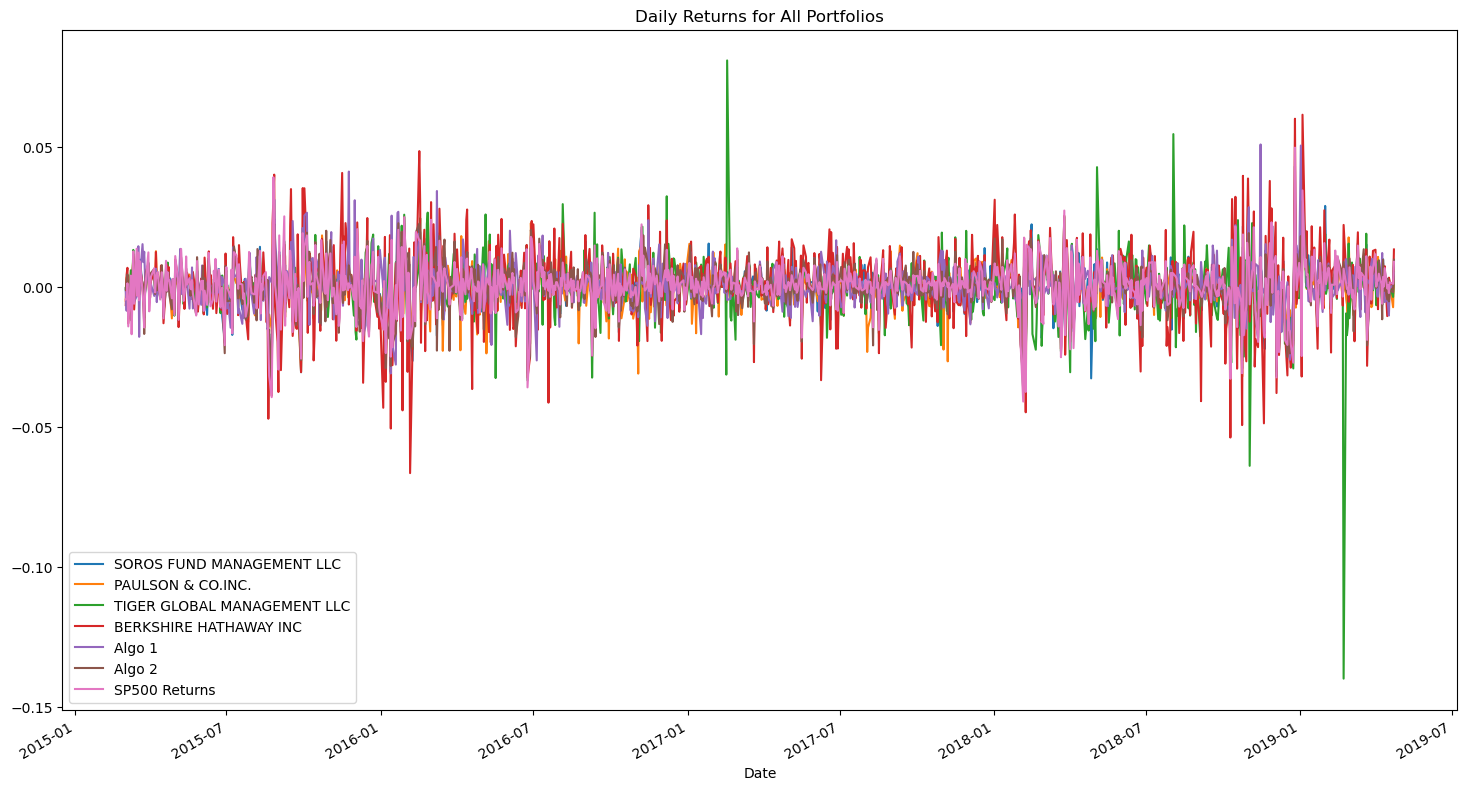

In [15]:
# Plot daily returns of all portfolios
combined_returns.plot(figsize=(18,10), title='Daily Returns for All Portfolios');

#### Calculate and Plot cumulative returns.

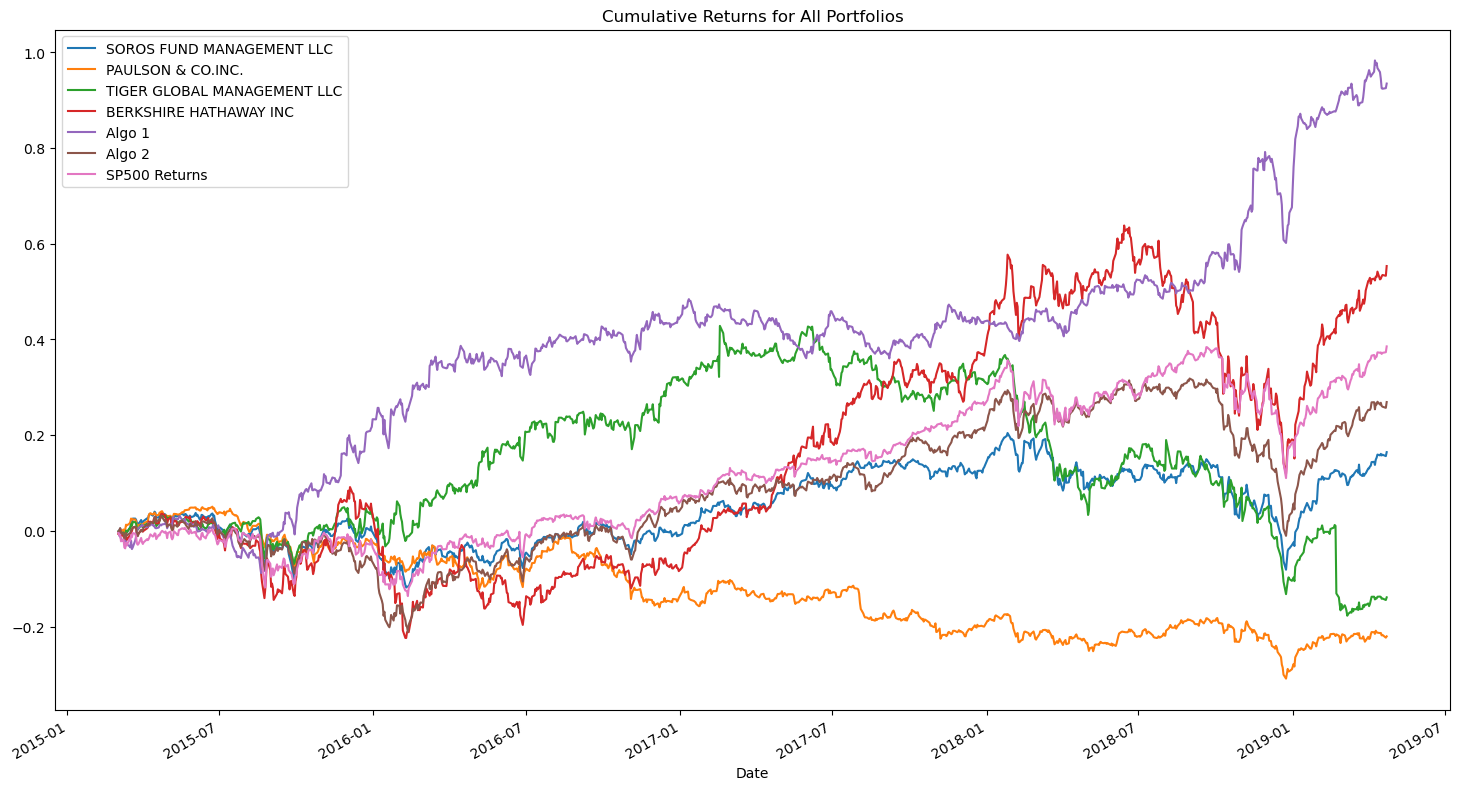

In [16]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_returns).cumprod() - 1

# Plot cumulative returns
cumulative_returns.plot(figsize=(18,10), title='Cumulative Returns for All Portfolios');

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


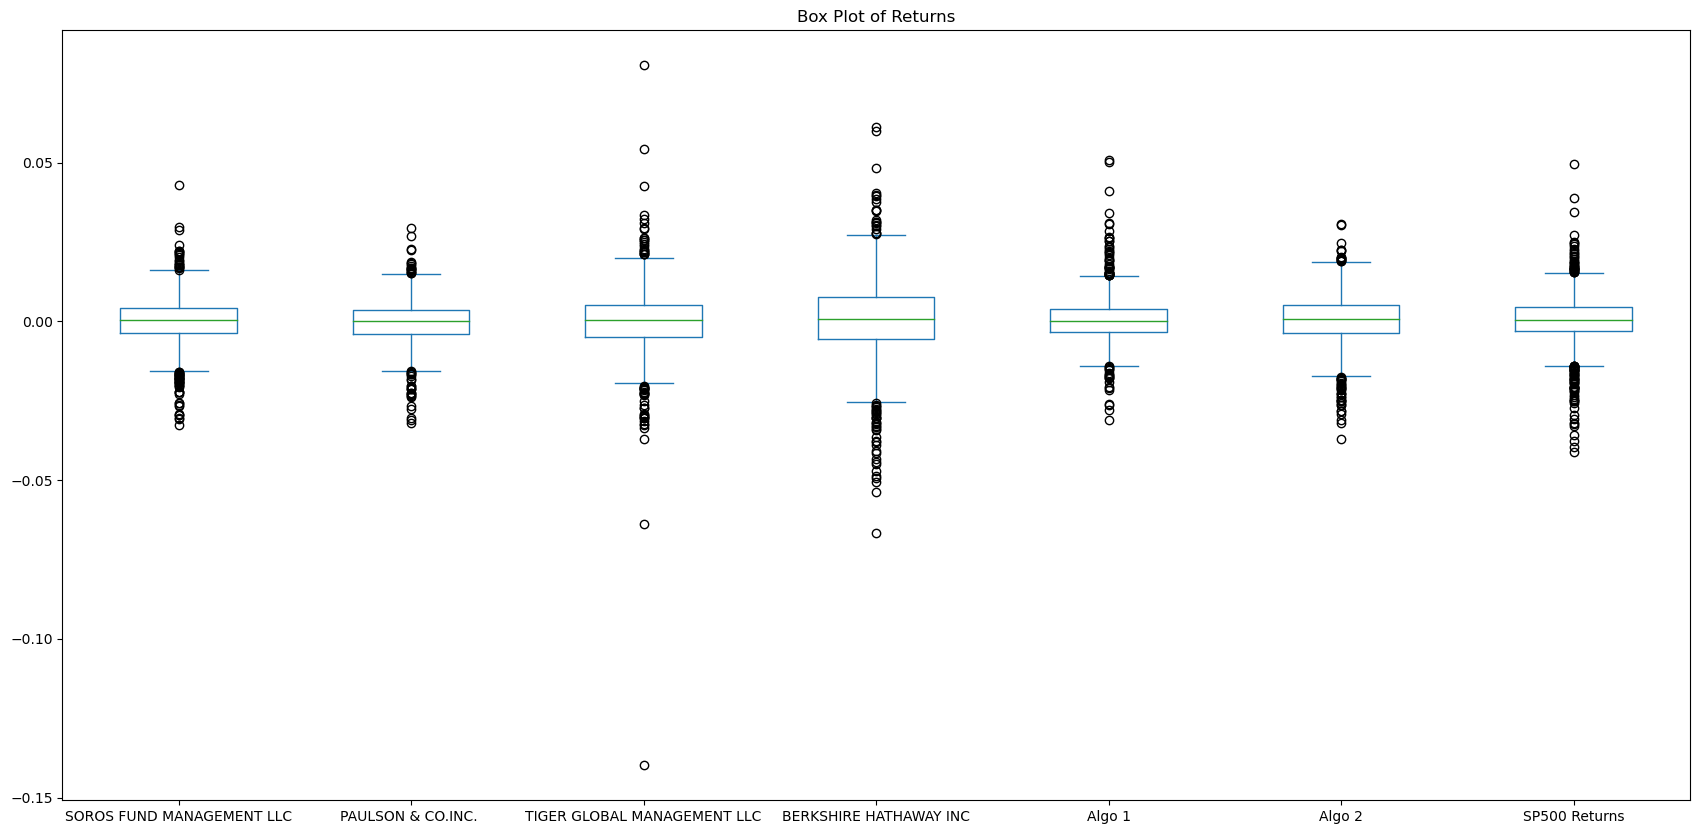

In [17]:
# Box plot to visually show risk
combined_returns.plot(kind='box', figsize=(21, 10), title='Box Plot of Returns');

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
combined_std = combined_returns.std()
combined_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP500 Returns                  0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [19]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = combined_returns['SP500 Returns'].std()

# Determine which portfolios are riskier than the S&P 500
combined_std.loc[(combined_std > sp500_std)]

TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
combined_annual_std = combined_std*np.sqrt(252)
combined_annual_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
SP500 Returns                  0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

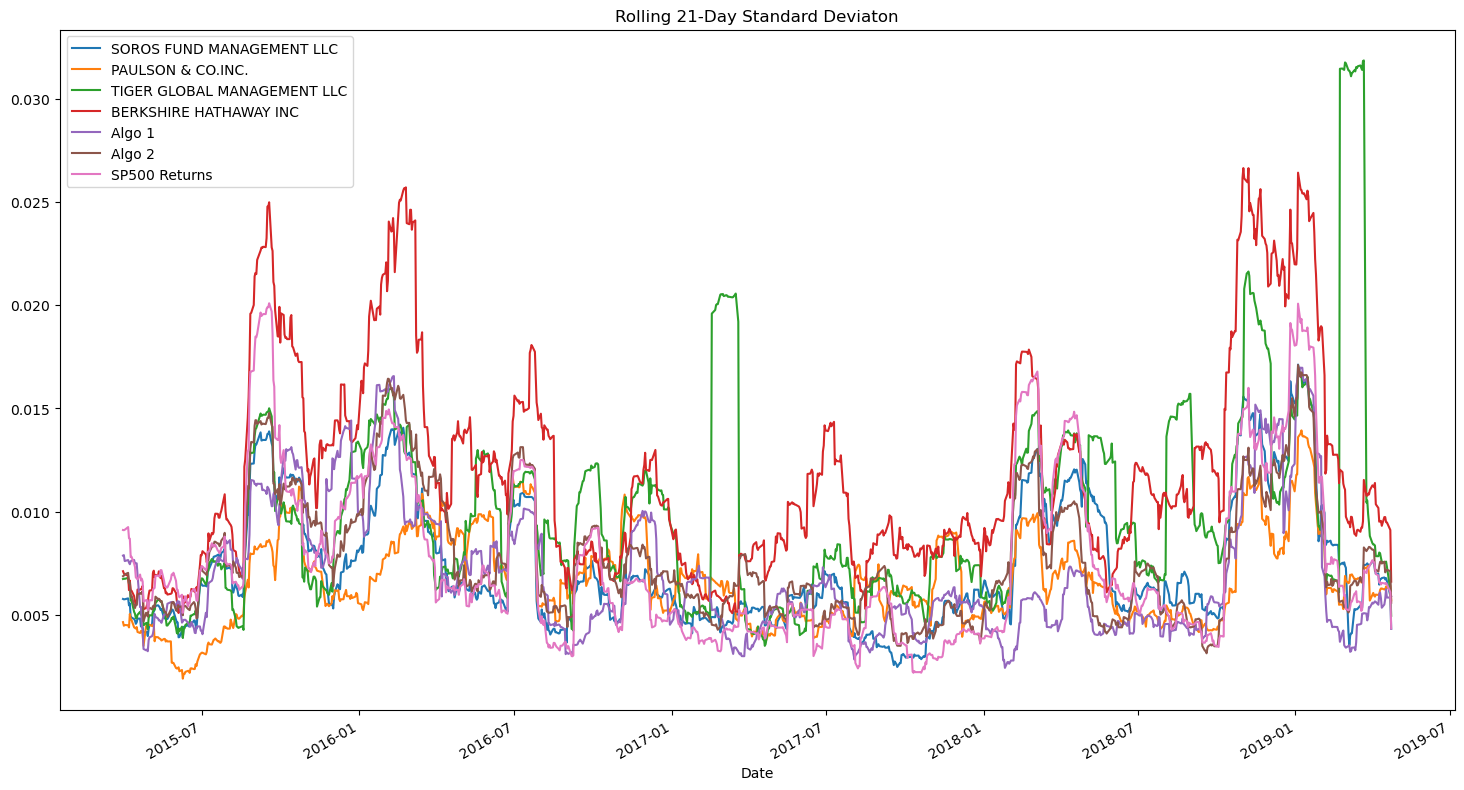

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_rolling21_std = combined_returns.rolling(window=21).std().dropna()

# Plot the rolling standard deviation
combined_rolling21_std.plot(figsize=(18,10), title='Rolling 21-Day Standard Deviaton');

### Calculate and plot the correlation

In [22]:
# Calculate the correlation
combined_correlation = combined_returns.corr()


# Display de correlation matrix
combined_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Returns
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SP500 Returns,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

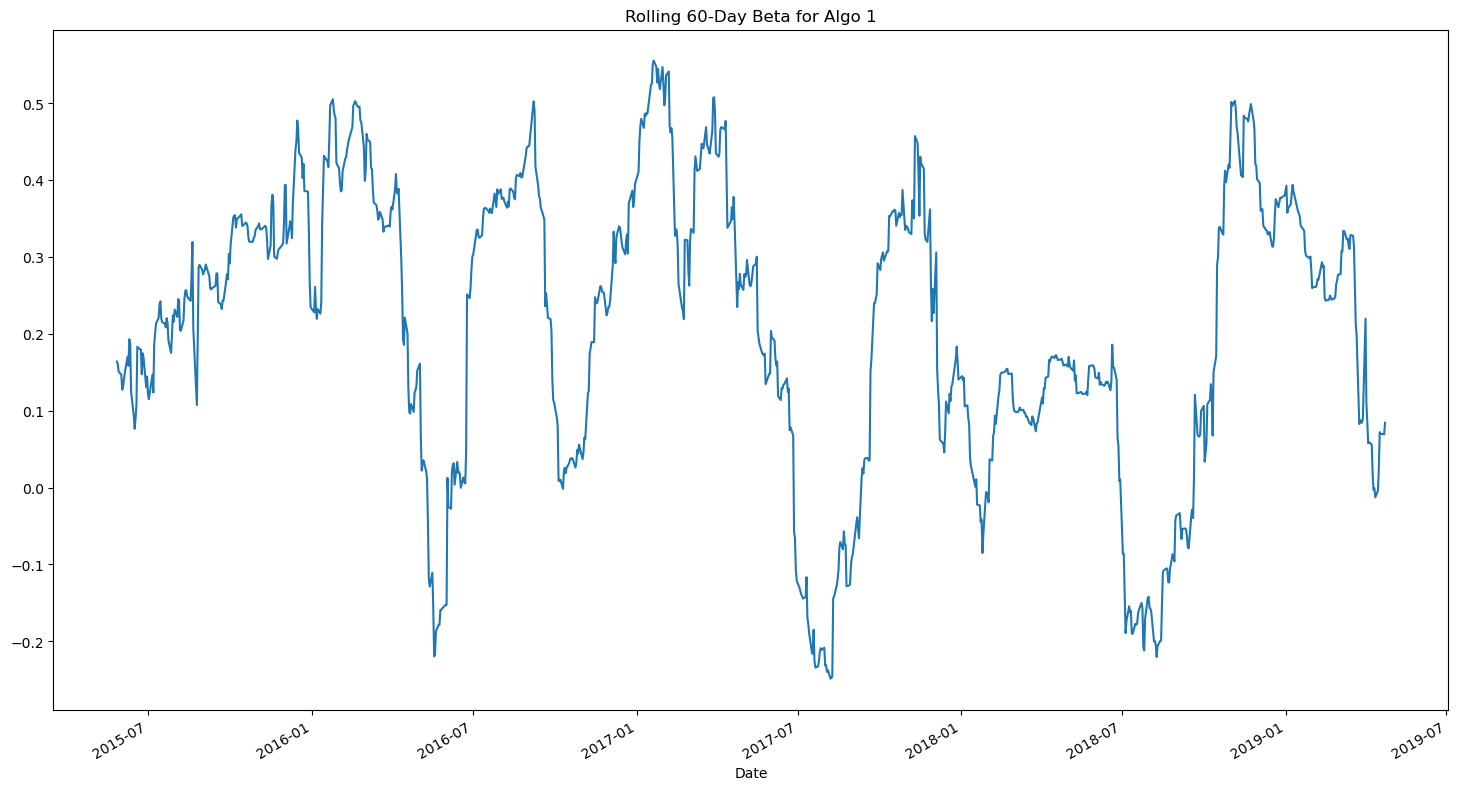

In [23]:
# Calculate covariance of a single portfolio
algo1_r60_covariance = combined_returns['Algo 1'].rolling(window=60).cov(combined_returns['SP500 Returns']).dropna()
algo1_r60_covariance

# Calculate variance of S&P 500
sp500_r60_variance = combined_returns['SP500 Returns'].rolling(window=60).var().dropna()
sp500_r60_variance 

# Computing beta
algo1_r60_beta = algo1_r60_covariance / sp500_r60_variance
algo1_r60_beta

# Plot beta trend
algo1_r60_beta.plot(figsize=(18,10), title='Rolling 60-Day Beta for Algo 1');

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [24]:
# Use `ewm` to calculate the rolling window
combined_ewm_std = combined_returns.ewm(halflife=21).std().dropna()
combined_ewm_std

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Returns
Date,,,,,,,
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.000106
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.003294
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.006498
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.007083
2015-03-10,0.005816,0.004707,0.006864,0.007841,0.002947,0.007315,0.008454
...,...,...,...,...,...,...,...
2019-04-16,0.007632,0.006846,0.016301,0.011939,0.006922,0.007938,0.007837
2019-04-17,0.007547,0.006846,0.016047,0.011746,0.007097,0.007896,0.007736
2019-04-18,0.007424,0.006737,0.015787,0.011554,0.006984,0.007779,0.007610


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [25]:
# Annualized Sharpe Ratios
combined_sharpe = (combined_returns.mean()*252) / (combined_returns.std() * np.sqrt(252))
combined_sharpe

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
SP500 Returns                  0.648267
dtype: float64

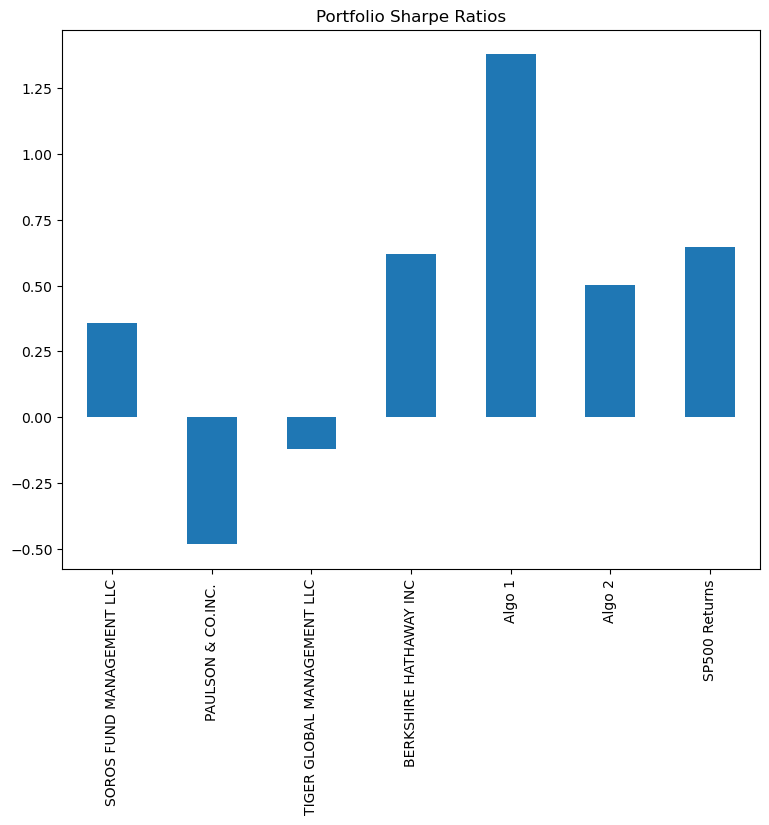

In [26]:
# Visualize the sharpe ratios as a bar plot
combined_sharpe.plot(kind='bar', figsize=(9,7), title='Portfolio Sharpe Ratios');

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

##### Algo 1 outperforms the market and all the whale portfolios.
##### Algo 2 only outperfoms Soros, Paulson, and Tiger Global

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [27]:
# Reading data from 1st stock
aapl_path = Path('Resources/aapl_historical.csv')

aapl_df = pd.read_csv(aapl_path, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True).sort_index(inplace=True)
aapl_df

/var/folders/7p/1ky7b7fs1x18nvftj75rs6yr0000gn/T/ipykernel_49600/97010541.py:4: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  aapl_df = pd.read_csv(aapl_path, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True).sort_index(inplace=True)


In [28]:
# Reading data from 2nd stock
cost_path = Path('Resources/cost_historical.csv')

cost_df = pd.read_csv(cost_path, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True).sort_index(inplace=True)
cost_df

/var/folders/7p/1ky7b7fs1x18nvftj75rs6yr0000gn/T/ipykernel_49600/1526779620.py:4: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  cost_df = pd.read_csv(cost_path, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True).sort_index(inplace=True)


In [29]:
# Reading data from 3rd stock
goog_path = Path('Resources/goog_historical.csv')

goog_df = pd.read_csv(goog_path, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True).sort_index(inplace=True)
goog_df

/var/folders/7p/1ky7b7fs1x18nvftj75rs6yr0000gn/T/ipykernel_49600/70719397.py:4: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  goog_df = pd.read_csv(goog_path, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True).sort_index(inplace=True)


In [30]:
# Combine all stocks in a single DataFrame
stocks_df = pd.concat([aapl_df, cost_df, goog_df], axis=1, join='inner').sort_index(inplace=True)
stocks_df

ValueError: All objects passed were None

In [ ]:
# Reset Date index
stocks_df.reset_index(inplace=True)
stocks_df

In [ ]:
# Reorganize portfolio data by having a column per symbol
stocks_df = stocks_df.drop(columns='Symbol')
stocks_df = stocks_df.set_index('Trade DATE').sort_index(inplace=True)
stocks_df = stocks_df.set_axis(['AAPL', 'COST', 'GOOG'], axis=1)
stocks_df


In [ ]:
# Calculate daily returns
stocks_returns = stocks_df.pct_change()

# Drop NAs
stocks_returns.dropna(inplace=True)

# Display sample data
stocks_returns.sample(5)

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
stocks_weighted_return = stocks_returns.dot(weights)

# Display sample data
stocks_weighted_return

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame
all_returns = pd.concat([combined_returns, stocks_weighted_return], axis=1)
all_returns.rename(columns={0:'Stocks'}, errors='raise', inplace=True)
all_returns.sort_index(inplace=True)
all_returns

In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_returns.dropna(inplace=True)
all_returns.isnull().sum()
all_returns

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`
all_annual_std = all_returns.std() * np.sqrt(252)
all_annual_std

### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation
all_r21_std = all_returns.rolling(window=21).std()

# Plot rolling standard deviation
all_r21_std.plot(figsize=(18,10), title='Rolling 21-Day Standard Deviation');

### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation
all_correlation = all_returns.corr()
#all_correlation.plot(figsize=(18,10))
all_correlation

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta
stocks_r60_covariance = all_returns['Stocks'].rolling(window=60).cov(all_returns['SP500 Returns'])
                                                                     
all_sp500_r60_variance = all_returns['SP500 Returns'].rolling(window=60).var()

stocks_r60_beta = stocks_r60_covariance / all_sp500_r60_variance

stocks_r60_beta.plot(figsize=(18,10), title='Stocks Rolling 60-Day Beta');

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios
all_annual_sharpe = (all_returns.mean() * 252 ) / (all_returns.std() * np.sqrt(252) )
all_annual_sharpe

In [ ]:
# Visualize the sharpe ratios as a bar plot
all_annual_sharpe.plot(kind='bar', figsize=(18,10), title='Annualized Sharpe Ratio for All Portofilios');

### How does your portfolio do?

#### My portfolio idd pretty good. My sharpe ratio is second only to Algo1. However, my picks have a pretty strong correlation to the S&P 500.